## Importações e instalações

In [1]:
!pip install -q ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.7 MB/s eta 0:00:00a 0:00:01
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO
import os, yaml, glob
import cv2
import matplotlib.pyplot as plt
import kagglehub

### Importando o Dataset

In [8]:
# Download latest version
path = kagglehub.dataset_download("barkataliarbab/license-plate-detection-dataset-10125-images")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/license-plate-detection-dataset-10125-images


## Verificação do Dataset (Imagens e Labels)

In [10]:
imgs = glob.glob(path + "/**/*.jpg", recursive=True) + glob.glob(path + "/**/*.png", recursive=True)
labels = glob.glob(path + "/**/*.txt", recursive=True)

print("Imagens:", len(imgs))
print("Labels:", len(labels))

print("Exemplo img:", imgs[0] if imgs else "Nenhuma")
print("Exemplo label:", labels[0] if labels else "Nenhuma")

Imagens: 10125
Labels: 10127
Exemplo img: /kaggle/input/license-plate-detection-dataset-10125-images/valid/images/CarLongPlateGen2256_jpg.rf.fdb57b471473e661eb9bbecdcde15eae.jpg
Exemplo label: /kaggle/input/license-plate-detection-dataset-10125-images/README.dataset.txt


## Configura o yaml

In [38]:
DATASET_PATH = "/kaggle/input/license-plate-detection-dataset-10125-images"
data_yaml_out = "/kaggle/working/data.yaml"

yaml_text = f"""
path: {DATASET_PATH}
train: train/images
val: valid/images
test: test/images

names:
  0: license_plate
"""

with open(data_yaml_out, "w") as f:
    f.write(yaml_text)

print("✅ YAML criado:", data_yaml_out)
print(yaml_text)

✅ YAML criado: /kaggle/working/data.yaml

path: /kaggle/input/license-plate-detection-dataset-10125-images
train: train/images
val: valid/images
test: test/images

names:
  0: license_plate



# Treinando o modelo

In [39]:
model = YOLO("yolov8s.pt")
model.train(
    data=data_yaml,
    epochs=70,
    imgsz=640,
    batch=16,
    device=0,
    workers=2,
    cache=True,
    patience=15,
    name="plate_detector"
)

Ultralytics 8.4.2 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=70, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=plate_detector8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=15, perspective=0.0, plots=Tru

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78a5212f3bc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Validação do modelo

In [41]:
# caminho do best.pt
BEST_PT = "/kaggle/working/runs/detect/plate_detector8/weights/best.pt"
model = YOLO(BEST_PT)
print("✅ Modelo carregado:", BEST_PT)

✅ Modelo carregado: /kaggle/working/runs/detect/plate_detector8/weights/best.pt


# Validação do modelo com uma imagem aleatória

✅ Imagem escolhida: /kaggle/input/license-plate-detection-dataset-10125-images/valid/images/xemay2385_jpg.rf.b7d6dfb0bf6162fa7463338bddf3feb1.jpg


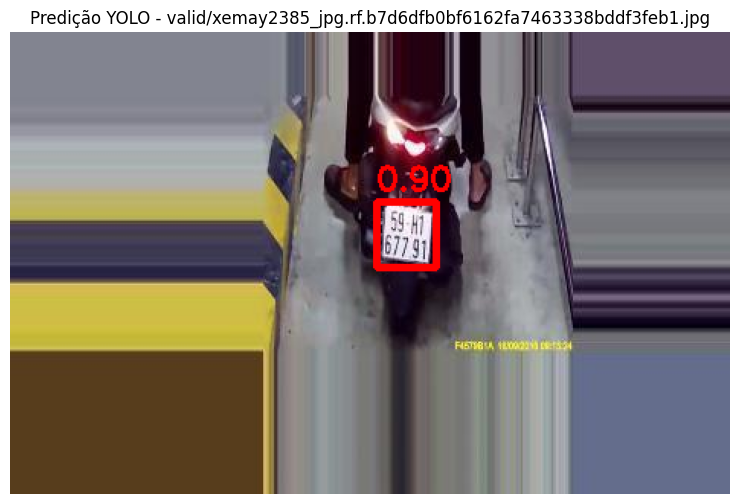

In [51]:
DATASET_PATH = "/kaggle/input/license-plate-detection-dataset-10125-images"

# você pode escolher: "train", "valid" ou "test"
SPLIT = "valid"

img_dir = os.path.join(DATASET_PATH, SPLIT, "images")
imgs = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]

img_name = random.choice(imgs)
img_path = os.path.join(img_dir, img_name)

print("✅ Imagem escolhida:", img_path)

# lendo com OpenCV
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# inferência
results = model.predict(img_bgr, conf=0.25, verbose=False)
res0 = results[0]

# desenha bbox
for box in res0.boxes:
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255, 0, 0), 3)  # vermelho
    cv2.putText(
        img_rgb,
        f"{float(box.conf.item()):.2f}",
        (x1, max(20, y1 - 8)),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (255, 0, 0),
        2
    )

plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Predição YOLO - {SPLIT}/{img_name}")
plt.show()